<a href="https://colab.research.google.com/github/runnin123/TIL/blob/master/05_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터
- 출처: Kaggle 연습 예제 데이터
- passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부. 0 = 사망, 1 = 생존
- pclass: 선실 등급. 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex: 성별
- name: 이름
- age: 나이
- sibsp: 함께 탑승한 형제자매 혹은 배우자 인원수
- parch: 함께 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구. C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# 필요한 패키지, 데이터 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
titanic_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 칼럼 데이터 타입 확인
print('\n ## 데이터 정보 ## \n')
print(titanic_df.info())


 ## 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 데이터 크기) row 891개, column 12개 
- 데이터 타입) int64 5개, object 5개, float64 2개
- Null 개수) 'Age' 177개, 'Cabin' 687개, 'Embarked' 2개
- 결측치 처리) 'Age': 평균 나이, 나머지 칼럼: 'N'

In [4]:
# 결측치 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

# 결측치 재확인
print('데이터셋 Null값 개수:', titanic_df.isnull().sum().sum())

데이터셋 Null값 개수: 0


In [6]:
# 문자열 피처 확인
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
E50              1
A10              1
C103             1
B41              1
B3               1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Sex와 Embarked에는 문제가 없으나 Cabin 칼럼의 N(결측치)이 비정상적으로 많음
- 또한 C23 C25 C27 / B96 B98 등 다른 선실들과 함께 표기된 값이 존재 → 정리 필요
- Cabin 값의 첫 알파벳(선실 등급)이 중요하게 생각됨 → 부자와 가난한 사람에 대한 차별이 있던 시절이기 때문

In [9]:
# Cabin 칼럼의 첫 글자 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


### 2. 성별간 비교
- 사고가 났을 경우: 여성, 아이들, 노약자가 최우선. 다음은 부자, 유명인 등
- 먼저 성별의 영향을 확인하기 위해 성별에 따른 생존자 수 비교

In [10]:
# Sex 칼럼과 Survived 칼럼을 묶어서 확인
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 남성 생존자 비율(약 18.8%)보다 여성 생존자 비율(약 74.2%)이 훨씬 높음을 확인
- 그래프로 확인
- Seaborn: 판다스 DataFrame과의 연동, 세련된 비주얼 등의 이유로 애용됨

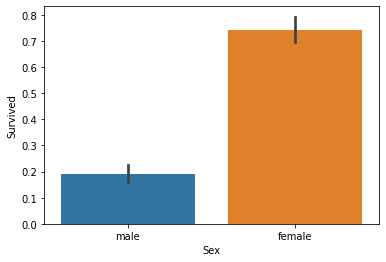

In [11]:
# 시각화: Seaborn 패키지 사용
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

### 3. 객실 등급별 비교
- 성별을 함께 고려해 분석하는 것이 효율적이라 판단

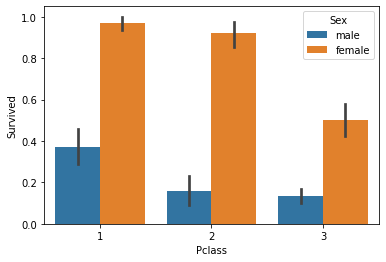

In [14]:
# 시각화를 통한 비교
# hue: 카테고리 변수 지정 → 색상으로 비교 가능
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

- 여성: 1등실과 2등실의 차이는 적으나 3등실의 경우 생존 확률이 비교적 적음
- 남성: 1등실이 2등실, 3등실에 비해 월등히 높음

### 4. 나이별 비교
- Age의 값이 너무 다양하므로 몇 가지 카테고리로 분류

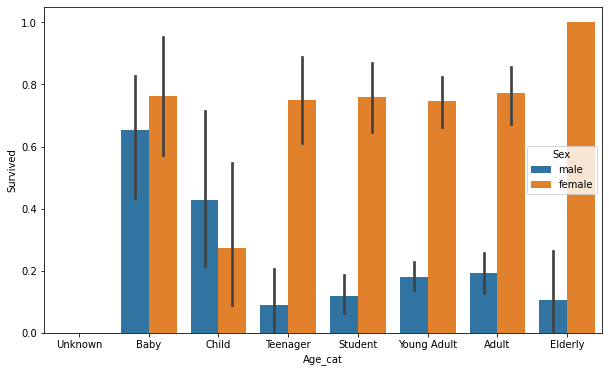

In [15]:
# 나이 분류 함수 생성
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown' # -1 이하의 오류 값 처리
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 막대그래프 크기 설정
plt.figure(figsize = (10, 6))

# X축 이름 순서 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda식에 함수 적용
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
# 시각화
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True) # 사용이 끝난 칼럼 삭제

- 여자 Baby, Elderly: 생존 확률이 매우 높음
- 여자 Child: 다른 나이대의 여자보다 생존 확률이 낮음
- 남자 Teenager, Student, Young Adult, Adult, Elderly: 생존 확률이 매우 낮음

### 5. 문자열 카테고리 피처 변환
- LabelEncoder 클래스 사용, 레이블 인코딩 적용

In [16]:
from sklearn import preprocessing

# 문자열 카테고리 피처를 한 번에 인코딩하는 함수 생성
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 6. 전처리 과정 함수화

In [17]:
# 지금까지의 전처리 과정을 함수화(재사용 위해)

# 결측치 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)

  return df

# 불필요한 피처 제거 함수
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

  return df

# 레이블 인코딩
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df

# 위의 함수들 호출, 적용하는 함수
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)

  return df

In [18]:
# 원본 데이터 다시 로드, 피처 데이터셋/레이블 데이터셋 추출
titanic_df = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

### 7. 학습/테스트 데이터 분할

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

### 8. 학습 및 예측, 평가

- 의사 결정 트리, 랜덤 포레스트, 로지스틱 회귀 사용
- 로지스틱 회귀: 이름과는 달리 매우 성능이 좋은 분류 알고리즘

In [21]:
from sklearn.tree import DecisionTreeClassifier # 의사 결정 트리
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.metrics import accuracy_score # 평가: 정확도

# 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# 의사 결정 트리
dt_clf.fit(X_train, y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측
print('의사 결정 나무 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred))) # 평가

# 랜덤 포레스트
rf_clf.fit(X_train, y_train) # 학습
rf_pred = rf_clf.predict(X_test) # 예측
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred))) # 평가

# 로지스틱 회귀
lr_clf.fit(X_train, y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred))) # 평가

의사 결정 나무 정확도: 0.7877
랜덤 포레스트 정확도: 0.8547
로지스틱 회귀 정확도: 0.8492


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 9. 교차 검증
- 의사 결정 나무 모델 평가

9 - 1) cross_val_score( )

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


9 - 2) GridSearchCV
- cv = 5
- max_depth, min_samples_split, min_samples_leaf 변경

In [23]:
from sklearn.model_selection import GridSearchCV

# 교차 검증할 파라미터 설정
parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf':[1, 5, 8]}

# GridSearchCV 객체 생성 후 교차 검증 수행
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

# 최적 하이퍼 파라미터, 최고 정확도 출력
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# 적용된 Estimator로 예측, 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('GridSearchCV 적용 후 의사 결정 나무 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
GridSearchCV 적용 후 의사 결정 나무 정확도: 0.8715
